<a href="https://colab.research.google.com/github/Tricky1010/Innovate-2024/blob/main/Innovate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Sample data with real forest names and realistic values
data = {
    'latitude': [34.56, 35.30, 36.10, 34.75, 35.80],
    'longitude': [-119.70, -120.45, -121.15, -119.85, -120.50],
    'size': [500, 1200, 300, 700, 450],
    'temperature': [30.5, 35.0, 28.4, 33.5, 31.0],
    'humidity': [40, 30, 50, 35, 45],
    'wind_speed': [5.2, 6.5, 4.8, 5.5, 5.0],
    'precipitation': [0.0, 0.0, 0.1, 0.0, 0.2],
    'forest_name': ['Amazon Rainforest', 'Black Forest', 'Congo Rainforest', 'Daintree Rainforest', 'Tongass National Forest']
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the dataframe to a CSV file for future use
df.to_csv('forest_fires.csv', index=False)

# Display the dataframe
print(df)


   latitude  longitude  size  temperature  humidity  wind_speed  \
0     34.56    -119.70   500         30.5        40         5.2   
1     35.30    -120.45  1200         35.0        30         6.5   
2     36.10    -121.15   300         28.4        50         4.8   
3     34.75    -119.85   700         33.5        35         5.5   
4     35.80    -120.50   450         31.0        45         5.0   

   precipitation              forest_name  
0            0.0        Amazon Rainforest  
1            0.0             Black Forest  
2            0.1         Congo Rainforest  
3            0.0      Daintree Rainforest  
4            0.2  Tongass National Forest  


In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())



# Display the DataFrame after handling missing values
print("DataFrame after handling missing values:")
print(df)


Missing values in each column:
latitude         0
longitude        0
size             0
temperature      0
humidity         0
wind_speed       0
precipitation    0
forest_name      0
dtype: int64
DataFrame after handling missing values:
   latitude  longitude  size  temperature  humidity  wind_speed  \
0     34.56    -119.70   500         30.5        40         5.2   
1     35.30    -120.45  1200         35.0        30         6.5   
2     36.10    -121.15   300         28.4        50         4.8   
3     34.75    -119.85   700         33.5        35         5.5   
4     35.80    -120.50   450         31.0        45         5.0   

   precipitation              forest_name  
0            0.0        Amazon Rainforest  
1            0.0             Black Forest  
2            0.1         Congo Rainforest  
3            0.0      Daintree Rainforest  
4            0.2  Tongass National Forest  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features for normalization
features = ['latitude', 'longitude', 'temperature', 'humidity', 'wind_speed', 'precipitation', 'size']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df[features] = scaler.fit_transform(df[features])

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(df)


Normalized DataFrame:
   latitude  longitude      size  temperature  humidity  wind_speed  \
0 -1.257779   1.215591 -0.416120    -0.508281  0.000000   -0.335201   
1 -0.003390  -0.231541  1.824526     1.430078 -1.414214    1.843604   
2  1.352706  -1.582198 -1.056304    -1.412848  1.414214   -1.005602   
3 -0.935706   0.926165  0.224065     0.783959 -0.707107    0.167600   
4  0.844170  -0.328017 -0.576166    -0.292908  0.707107   -0.670402   

   precipitation              forest_name  
0          -0.75        Amazon Rainforest  
1          -0.75             Black Forest  
2           0.50         Congo Rainforest  
3          -0.75      Daintree Rainforest  
4           1.75  Tongass National Forest  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

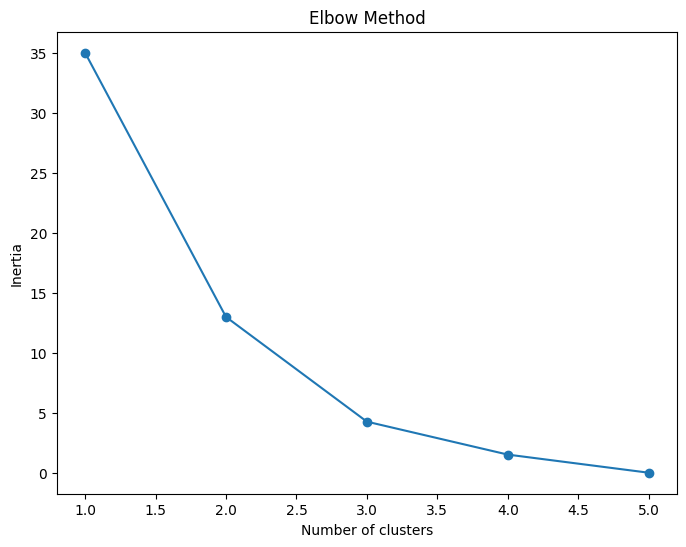

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the previously created DataFrame
df = pd.read_csv('forest_fires.csv')

# List of features to normalize
features = ['latitude', 'longitude', 'temperature', 'humidity', 'wind_speed', 'precipitation', 'size']

# Normalize the data again (if necessary)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Determine the optimal number of clusters using the Elbow method
# Adjust the range to ensure the number of clusters is less than or equal to the number of samples
inertia = []
for k in range(1, 6):  # Change the upper limit to 6 (or less)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

# Plot the results of the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), inertia, marker='o')  # Adjust the x-axis range accordingly
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Apply K-Means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

# Display the DataFrame with cluster labels
print("DataFrame with cluster labels:")
print(df)


DataFrame with cluster labels:
   latitude  longitude      size  temperature  humidity  wind_speed  \
0 -1.257779   1.215591 -0.416120    -0.508281  0.000000   -0.335201   
1 -0.003390  -0.231541  1.824526     1.430078 -1.414214    1.843604   
2  1.352706  -1.582198 -1.056304    -1.412848  1.414214   -1.005602   
3 -0.935706   0.926165  0.224065     0.783959 -0.707107    0.167600   
4  0.844170  -0.328017 -0.576166    -0.292908  0.707107   -0.670402   

   precipitation              forest_name  cluster  
0          -0.75        Amazon Rainforest        1  
1          -0.75             Black Forest        2  
2           0.50         Congo Rainforest        3  
3          -0.75      Daintree Rainforest        1  
4           1.75  Tongass National Forest        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


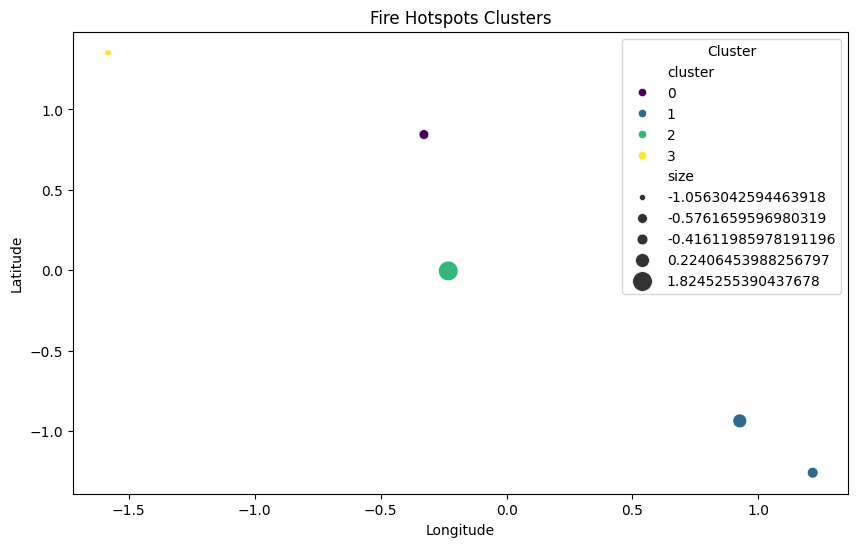

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', palette='viridis', data=df, size='size', sizes=(20, 200))
plt.title('Fire Hotspots Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()
